In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
import gitInformation
import random

In [2]:
%matplotlib inline 

In [3]:
gitInformation.printInformation()

Information about this notebook
Date: 2016-01-14
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\.git
Current git SHA: 4d39667b48cf41a1929917299510a1b804f05736
Remotes: origin, 
Current branch: master
origin remote URL: https://github.com/dowa4213/kt-2015-DSPHandsOn.git


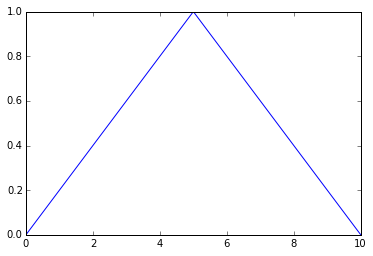

In [4]:
# Generate a triangle and normalize it.
tri = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1,0])
tri2 = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1, 0])
tri = tri/5.
tri2 = tri2/5.
plt.plot(tri)

In [5]:
# Generates sine waves with different wave numbers and samples
def sineGenerator(samples, waveNumber = 1):
    time = np.linspace(0, 2, samples)
    data = np.sin(np.pi*time*waveNumber)
    return data

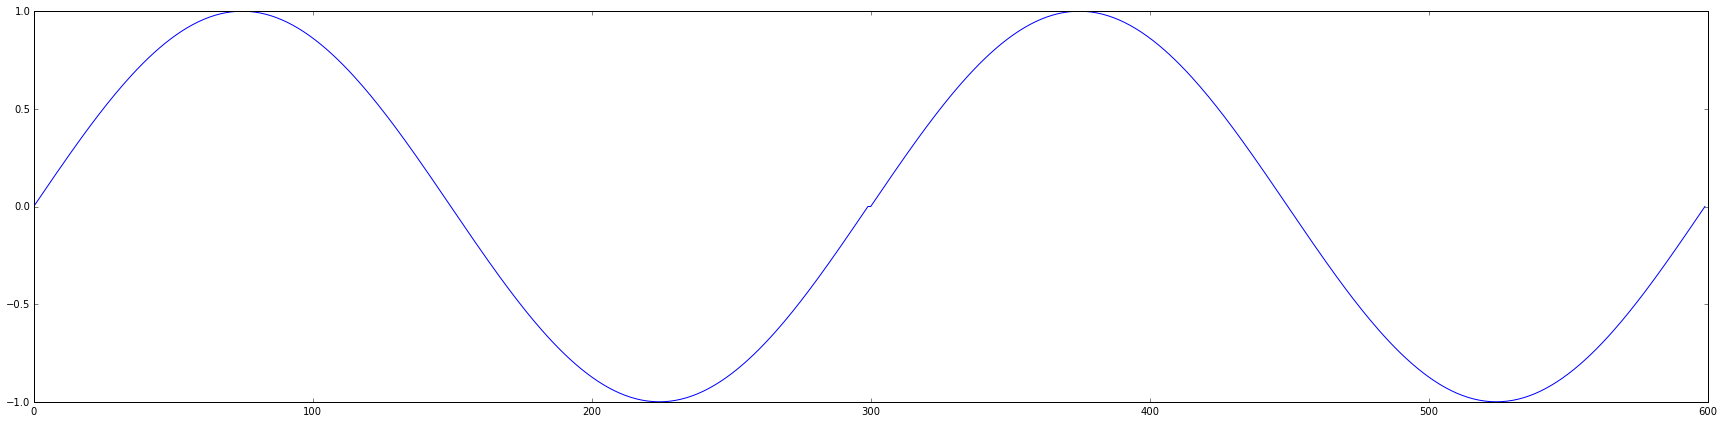

In [6]:
data1 = sineGenerator(300,1)
data1 = np.append(data1, sineGenerator(300,1))
plt.figure(figsize=(30,7))
plt.plot(data1)

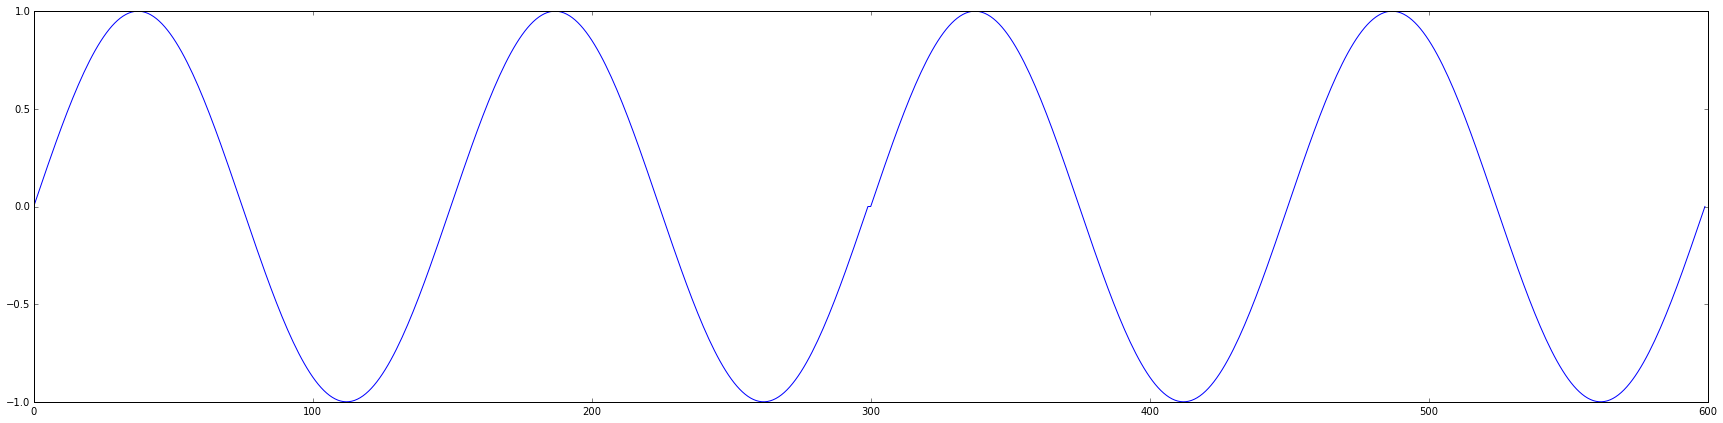

In [7]:
data2 = sineGenerator(300,2)
data2 = np.append(data2, sineGenerator(300,2))
plt.figure(figsize=(30,7))
plt.plot(data2)

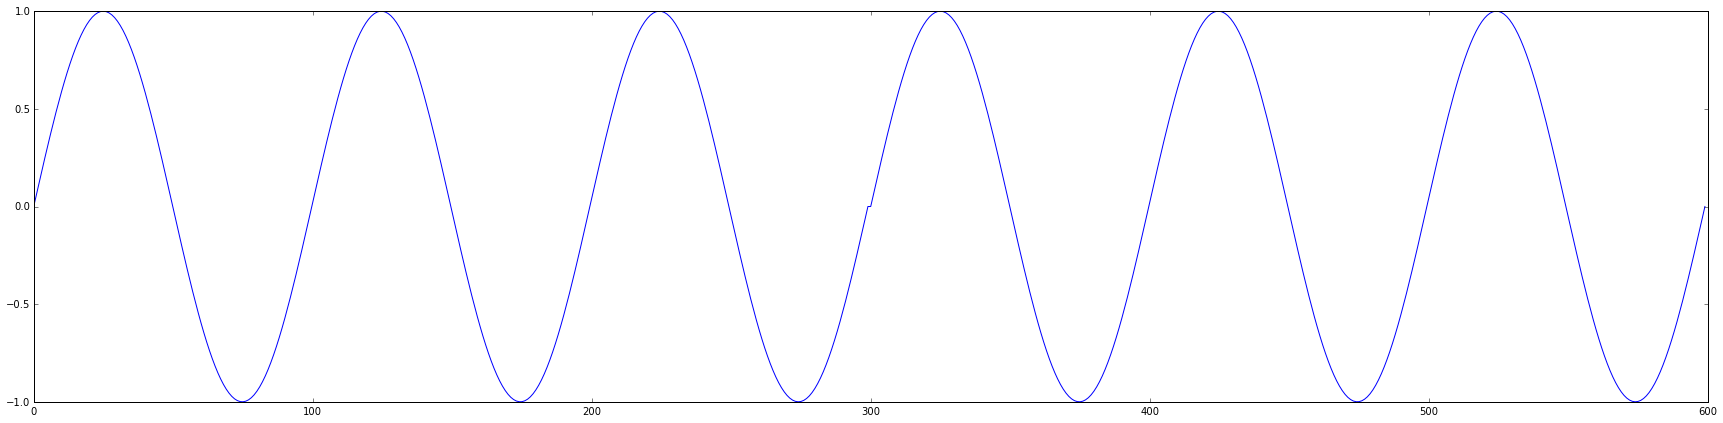

In [8]:
data3 = sineGenerator(300,3)
data3 = np.append(data3, sineGenerator(300,3))
plt.figure(figsize=(30,7))
plt.plot(data3)

In [9]:
# Add spikes to the generated sine waves, at random position and with random spike height.
def spikeAdder(data, tri):
    randomPosition = 0
    while (randomPosition + 11) < len(data):
        randomPosition = randomPosition + random.randint(50,100)
        if len(data[randomPosition:randomPosition + 11]) == 11:
            tri1 = tri/random.uniform(1, 3*tri.max())
            data[randomPosition:randomPosition + 11] = data[randomPosition:randomPosition + 11] + tri1
    return data

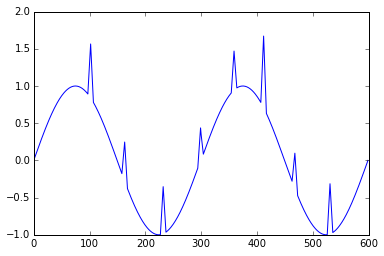

In [10]:
data1_new = spikeAdder(data1, tri)
plt.figure()
plt.plot(data1_new)
#plt.savefig("NormalSinewave + Spikes.png", dpi = 400)

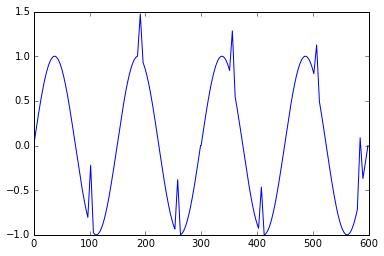

In [11]:
data2_new = spikeAdder(data2, tri)
plt.figure()
plt.plot(data2_new)
#plt.savefig("2x Sinewave + Spikes.png", dpi = 400)

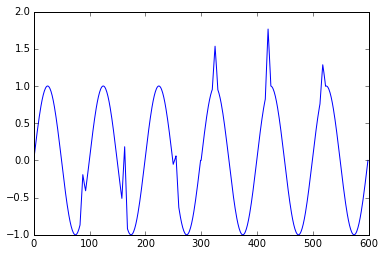

In [12]:
data3_new = spikeAdder(data3, tri)
plt.figure()
plt.plot(data3_new)
#plt.savefig("3x Sinewave + Spikes.png", dpi = 400)

In [20]:
windowLength = [25, 35, 45, 75, 95]

In [18]:
# Filter the data with a median filter and different window lengths
def filtering(windowLength, data):
    filtered = np.zeros((len(windowLength), len(data)))
    count = -1
    for i in windowLength:
        count += 1
        filtered[count,:] = medfilt(data, i)
    return filtered

In [16]:
filtered1 = filtering(windowLength, data1_new)

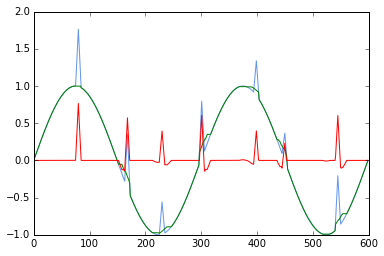

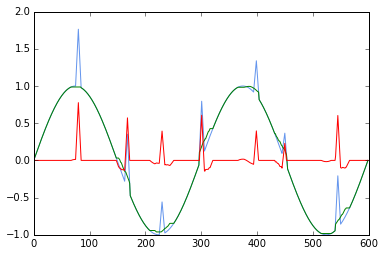

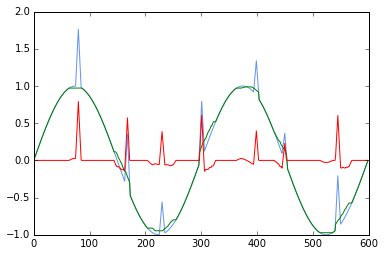

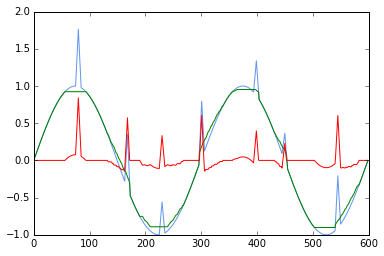

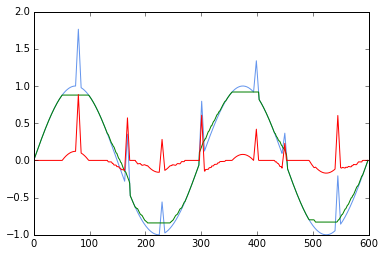

In [17]:
for i in range(len(windowLength)):
    plt.figure(i)
    plt.plot(data1_new, color = "cornflowerblue")
    plt.plot(filtered1[i,:], color = 'green')
    plt.plot(data1_new - filtered1[i,:], color = 'red')
    plt.savefig("Res1,%s.png" %(i), dpi = 400)

In [19]:
filtered2 = filtering(windowLength, data2_new)

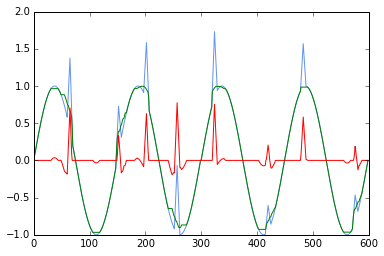

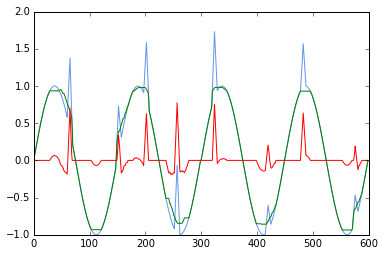

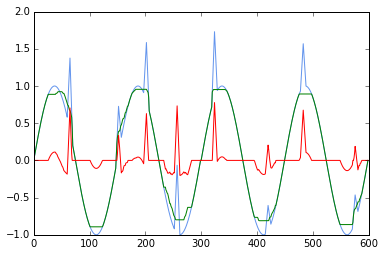

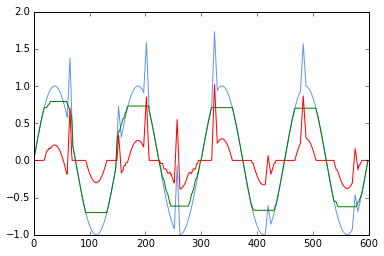

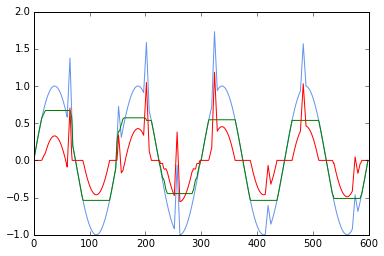

In [20]:
for i in range(len(windowLength)):
    plt.figure(i)
    plt.plot(data2_new, color = "cornflowerblue")
    plt.plot(filtered2[i,:], color = 'green')
    plt.plot(data2_new - filtered2[i,:], color = 'red')
    plt.savefig("Res2,%s.png" %(i), dpi = 400)

In [21]:
filtered3 = filtering(windowLength, data3_new)

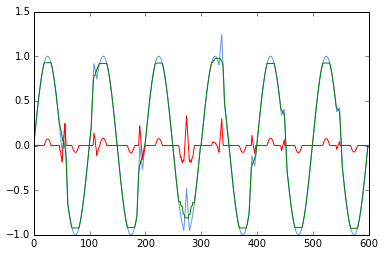

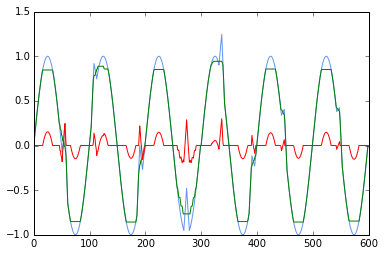

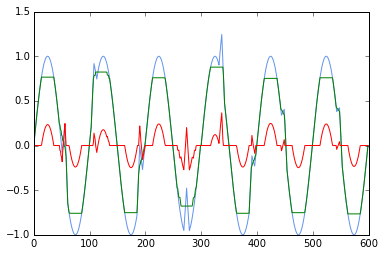

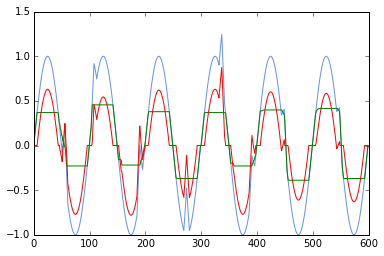

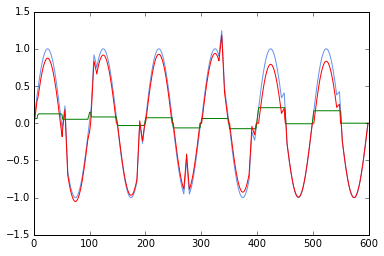

In [22]:
for i in range(len(windowLength)):
    plt.figure(i)
    plt.plot(data3_new, color = "cornflowerblue")
    plt.plot(filtered3[i,:], color = 'green')
    plt.plot(data3_new - filtered3[i,:], color = 'red')
    plt.savefig("Res3,%s.png" %(i), dpi = 400)

In [10]:
waveNumber = [1,2,3,4,5,6]
# Generate a sine wave with increasing frequency.
def sineGenerator1(samples, waveNumber):
    data_new = np.array([])
    for i in waveNumber:
        time = np.linspace(0, 2, samples)
        data = np.sin(np.pi*time*i)
        data_new = np.append(data_new, data)
    return data_new

In [29]:
# Because of more samples the spike position must be edited, otherwise we would have to much spikes.
def spikeAdder1(data, tri):
    randomPosition = 0
    while (randomPosition + 11) < len(data):
        randomPosition = randomPosition + random.randint(150,300)
        if len(data[randomPosition:randomPosition + 11]) == 11:
            tri1 = tri/random.uniform(1, 3*tri.max())
            data[randomPosition:randomPosition + 11] = data[randomPosition:randomPosition + 11] + tri1
    return data

In [30]:
increasingfreq = sineGenerator1(1024, waveNumber)

In [31]:
increasingfreq_new = spikeAdder1(increasingfreq, tri)

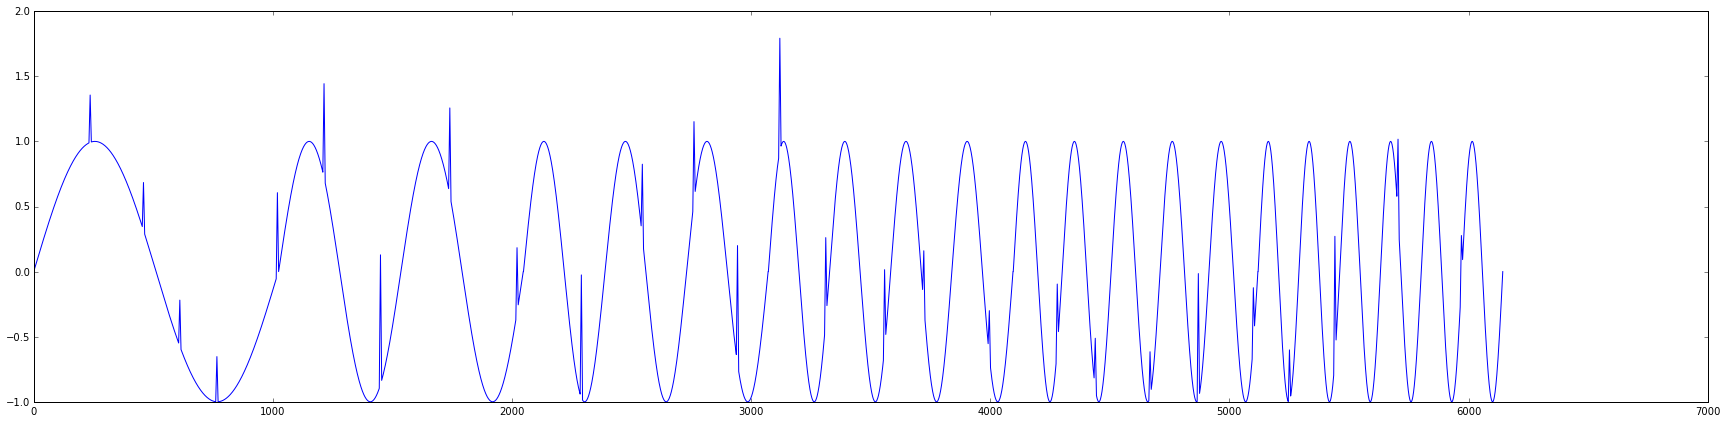

In [37]:
plt.figure(figsize=(30,7))
plt.plot(increasingfreq_new)
plt.savefig("Increainfreq.png", dpi = 400)

In [33]:
increasingfreq_new1 = filtering(windowLength, increasingfreq_new)

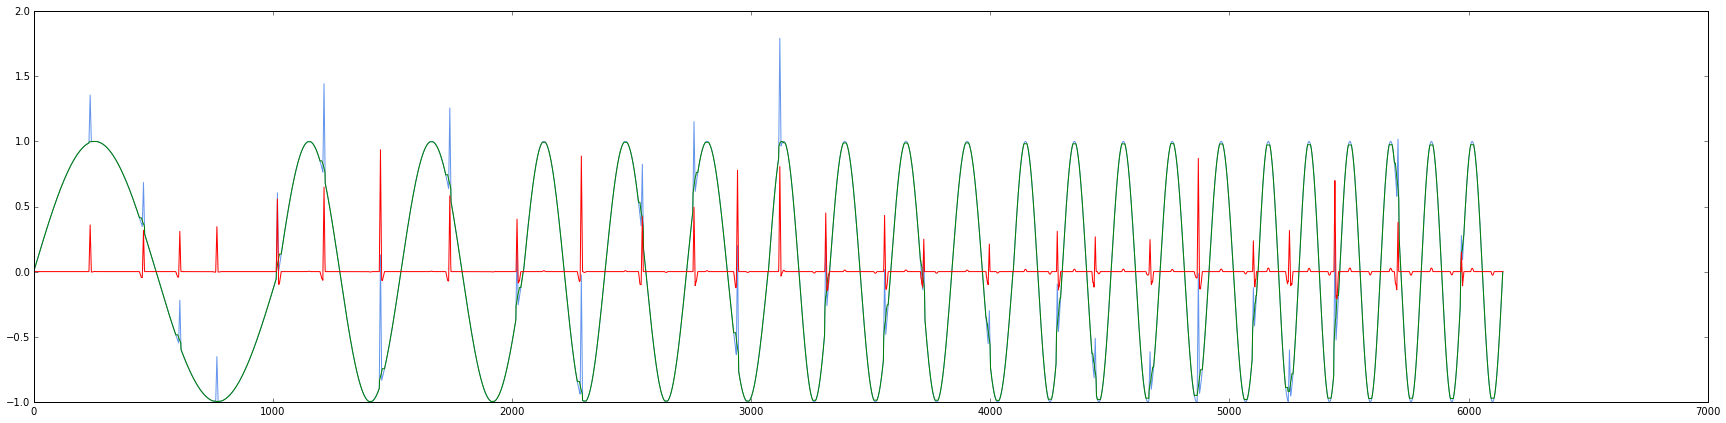

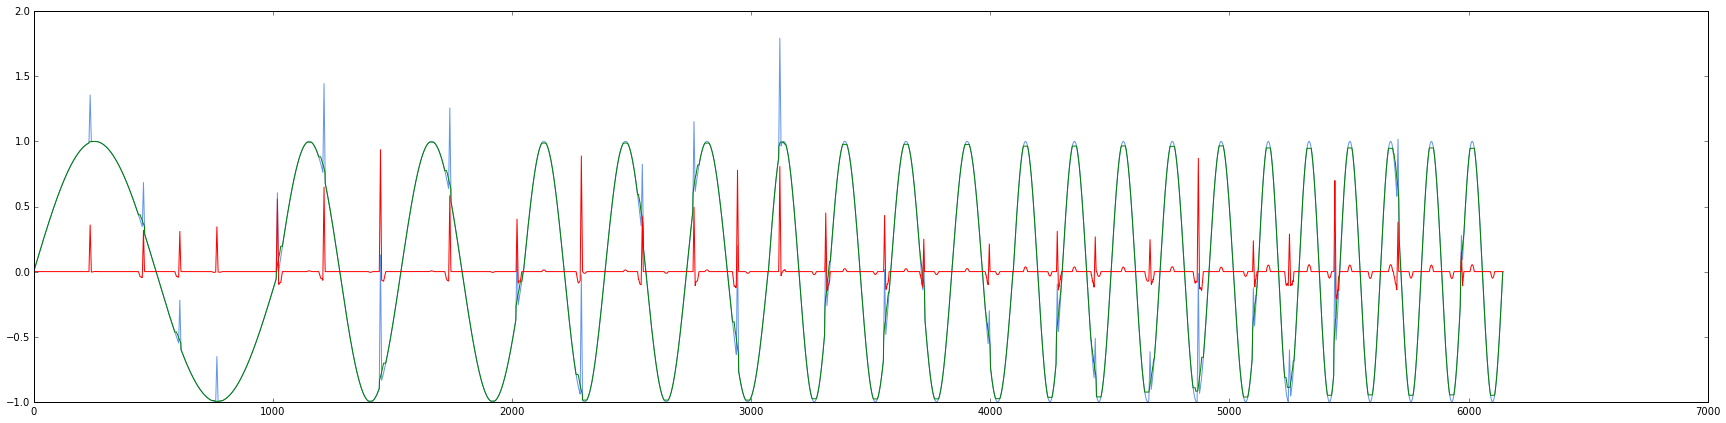

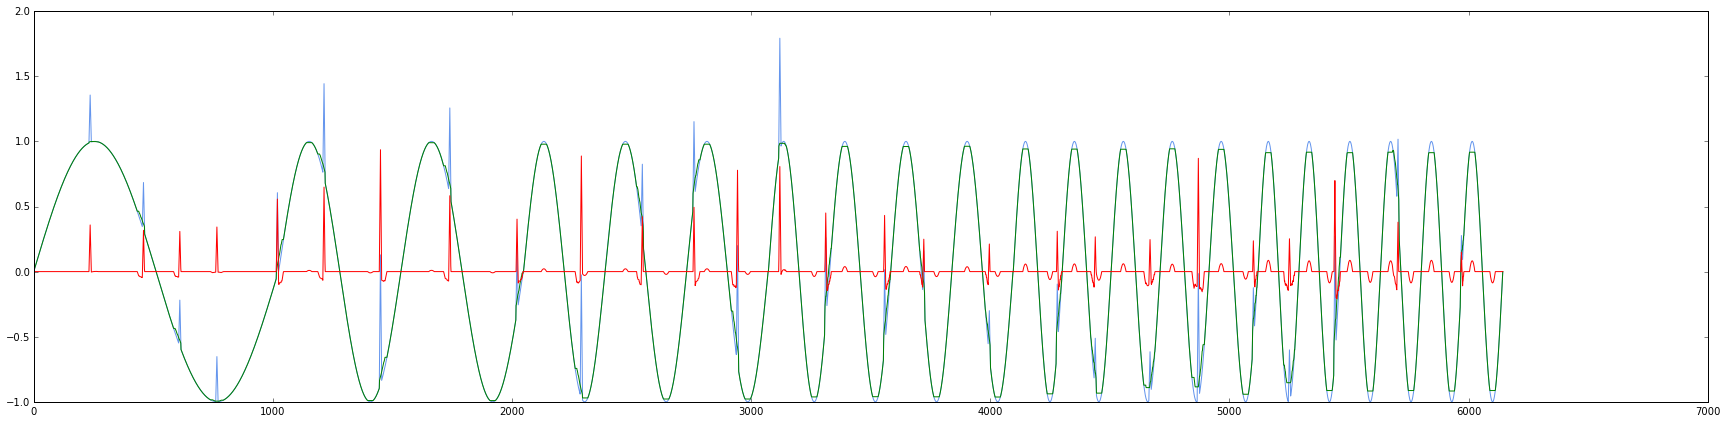

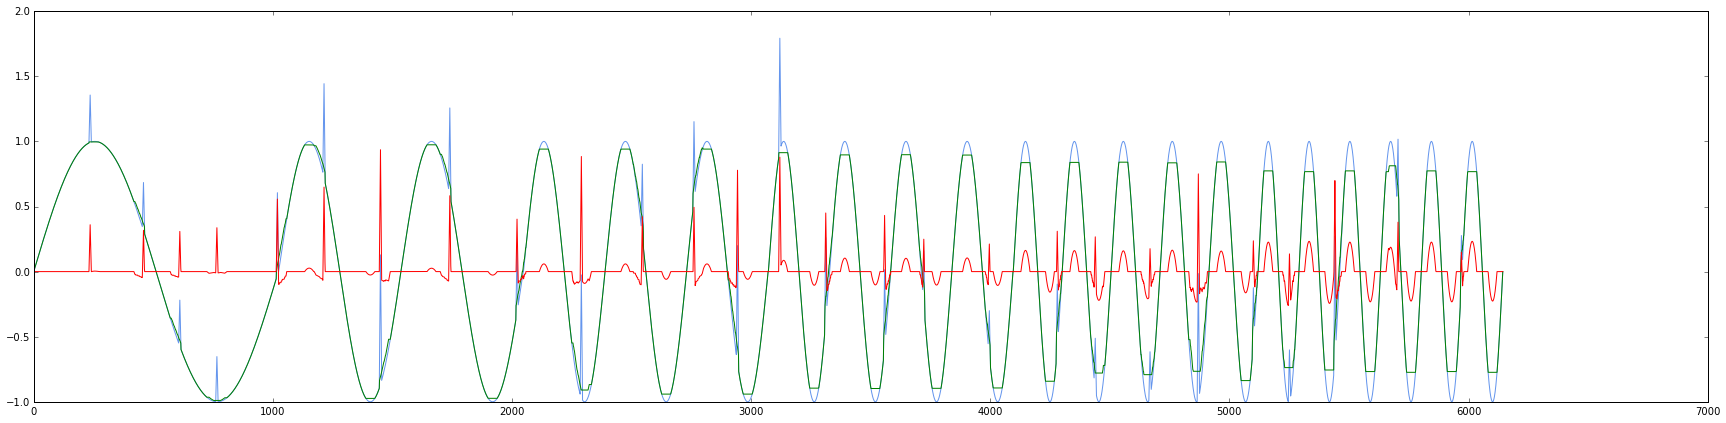

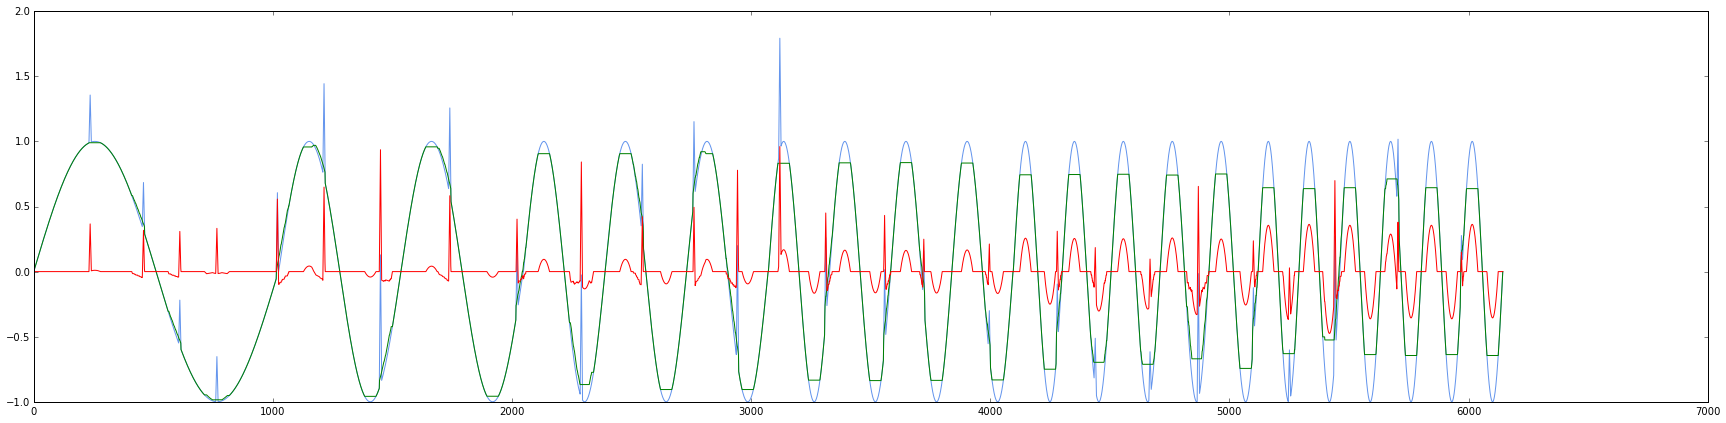

In [35]:
for i in range(len(windowLength)):
    plt.figure(i, figsize=(30,7))
    plt.plot(increasingfreq_new, color = "cornflowerblue")
    plt.plot(increasingfreq_new1[i,:], color = 'green')
    plt.plot(increasingfreq_new - increasingfreq_new1[i,:], color = 'red')
    plt.savefig("Res4,%s.png" %(i), dpi = 400)